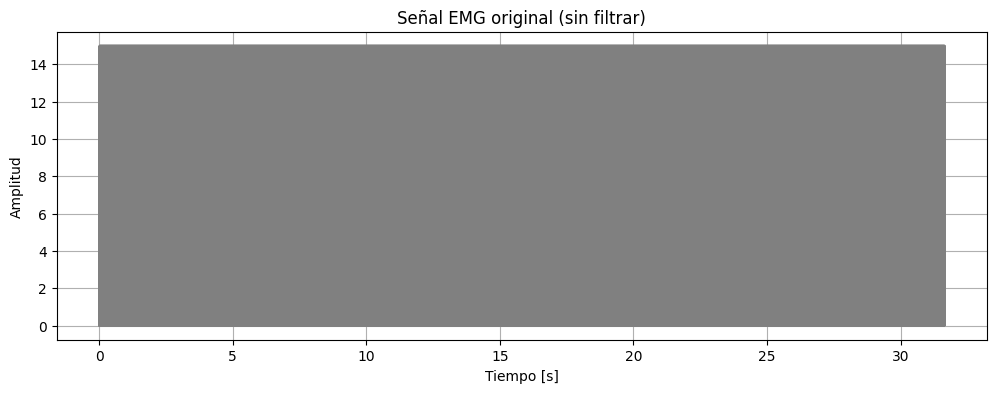

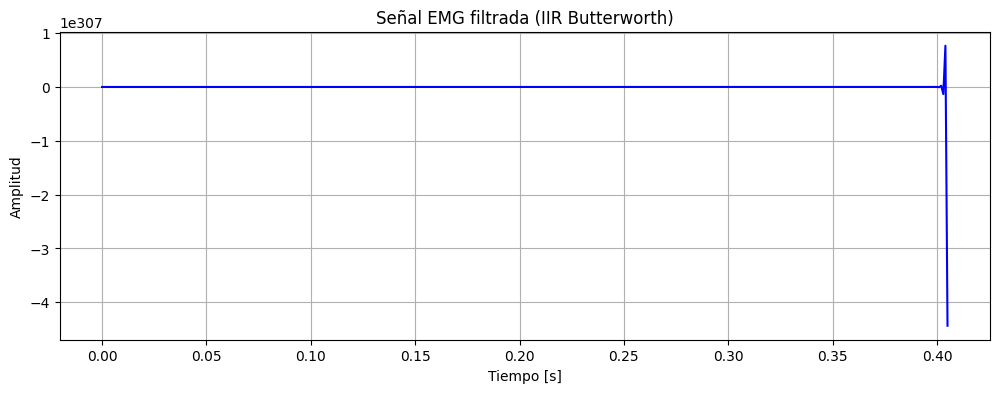

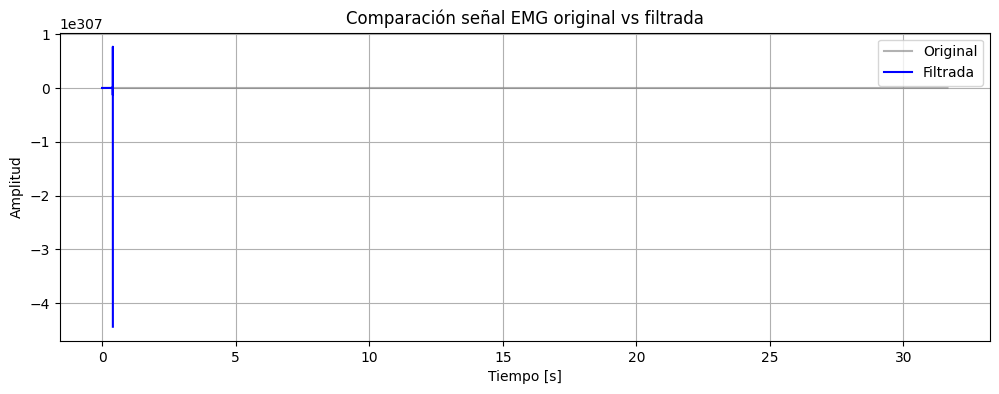

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import lfilter


# 1. Cargar la señal EMG original
# -------------------------------
# Archivo de la señal original (ajusta la ruta si es necesario)
file_emg = "C:/Users/aml/Downloads/biceps contrafuerza 1.txt"

# El archivo suele venir con una columna por canal (BITalino)
emg_data = np.loadtxt(file_emg)

# Si tu archivo tiene varias columnas, ajusta aquí:
# Supongamos que el EMG está en la primera columna
emg_signal = emg_data[:, 0]

fs = 1000  # frecuencia de muestreo Hz (BITalino)
t = np.arange(len(emg_signal)) / fs
file_coeffs = "C:/Users/aml/Downloads/EMG_1.1_FILTRO_IIR_BUTTERWORTH.csv"
coeffs = pd.read_csv(file_coeffs)

# Usar los nombres reales de las columnas del DataFrame para los coeficientes
b = coeffs[coeffs.columns[0]].dropna().to_numpy()
a = coeffs[coeffs.columns[1]].dropna().to_numpy()

# -------------------------------
# 3. Aplicar el filtro
# -------------------------------
emg_filtered = lfilter(b, a, emg_signal)

# -------------------------------
# 4. Gráficos
# -------------------------------

# Señal original
plt.figure(figsize=(12,4))
plt.plot(t, emg_signal, color="gray")
plt.title("Señal EMG original (sin filtrar)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Señal filtrada
plt.figure(figsize=(12,4))
plt.plot(t, emg_filtered, color="blue")
plt.title("Señal EMG filtrada (IIR Butterworth)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Comparación sobrepuesta
plt.figure(figsize=(12,4))
plt.plot(t, emg_signal, color="gray", alpha=0.6, label="Original")
plt.plot(t, emg_filtered, color="blue", label="Filtrada")
plt.title("Comparación señal EMG original vs filtrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()